# Eigenvalues and Eigenvectors

Here we will study various functions for finding eigenvalues and eigenvectors. We will apply them to a few different types of matrices to better understand some of the claims made in the lecture.

## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
# For 3d plotting
from mpl_toolkits.mplot3d import Axes3D
# The following allows interaction with 3d plots,
# however, it also requires other modules to be installed.
# See the Animated Root Finding example for details.
# Without this the 3d plot is created, but is static.
%matplotlib widget

In the `scipy.linalg` module there are a number of functions for solving eigenvalue problems. These functions are roughly split into ones that only calculate the eigenvalues and ones that calculate both the eigenvalues and eigenvectors. We will be interested in finding both the eigenvalues and eigenvectors so will focus on that set of functions.

In [ ]:
la?

Also as always we should look at the documentation for any and all functions that interest us. Here we look at a few. In the prelab and lab we will explore the use of `eig_banded`.

In [ ]:
la.eig?

In [ ]:
la.eigh?

## Sample Matrix

Let us use the matrix from the system of linear equations we solved last week. Recall that for this system
$$
\mathsf{A} = \begin{pmatrix}
\hphantom{-}10 & -7 & 1 \\
-3 & \hphantom{-}2 & 6 \\
\hphantom{-}5 & -1 & 5
\end{pmatrix} . $$
We can find the eigenvalues and eigenvectors for this matrix.

In [2]:
A = np.array([[10, -7, 1.], [-3, 2, 6], [5, -1, 5]])
(lam, B) = la.eig(A)
print("Eigenvalues:", lam)
print("Matrix of eigenvectors:\n", B)

Eigenvalues: [-1.74671985+0.j          9.37335992+2.21029215j  9.37335992-2.21029215j]
Matrix of eigenvectors:
 [[ 0.51077299+0.j         -0.68330542+0.j         -0.68330542-0.j        ]
 [ 0.82042522+0.j         -0.14949126+0.25215869j -0.14949126-0.25215869j]
 [-0.25693074+0.j         -0.61825225+0.25480624j -0.61825225-0.25480624j]]


First notice that the eigenvalues and eigenvectors can be complex even for a real matrix. NumPy for some reason has chosen to use the (electrical) engineering notation for complex numbers, $\mathrm{j}\equiv\sqrt{-1}$ so complex numbers are of the form $x=\alpha+\beta\mathrm{j}$ and represented in Python as 
```
x = alpha + beta*1j
```
(notice the `1j`).

Next, the columns in the matrix returned, called `B` here, represent each of the eigenvectors. These are normalized to have unit magnitude.
(How do we verify this without using loops ...?)

In [3]:
print("Normalization of each eigenvector = ", np.sqrt(np.sum(np.abs(B)**2, axis=0)))

Normalization of each eigenvector =  [1. 1. 1.]


This matrix also diagonalizes $\mathsf{A}$, so that
$$ \mathsf{B}^{-1}\mathsf{A}\mathsf{B} = \left( \begin{array}{ccc}
\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
0 & 0 & \lambda_3
\end{array} \right). $$
We can verify this. To compare the results we can either extract the diagonal from the result or construct a diagonal matrix from the eigenvalues, both are accomplished using the `np.diag` function.

In [4]:
D = la.inv(B) @ A @ B
print("Binv A B =\n", D)
print("Matrix of eigenvalues?", np.allclose(D, np.diag(lam), atol=1e-12, rtol=1e-12))

Binv A B =
 [[-1.74671985e+00-1.72563323e-31j  5.21804822e-15-1.66533454e-15j
   4.66293670e-15+1.88737914e-15j]
 [ 2.78943535e-15-3.99680289e-15j  9.37335992e+00+2.21029215e+00j
  -5.32907052e-15-1.77635684e-15j]
 [ 2.27595720e-15+3.10862447e-15j -4.44089210e-15+3.55271368e-15j
   9.37335992e+00-2.21029215e+00j]]
Matrix of eigenvalues? True


The determinant of the matrix should be the product of the eigenvalues.
The determinant of a real matrix is real, the product of the eigenvalues may have a small imaginary part due to finite precision.

In [5]:
print(f'''Determinant\t\t =  {la.det(A)}
Product of eigenvalues\t = {np.prod(lam)}''')

Determinant		 =  -162.00000000000003
Product of eigenvalues	 = (-161.99999999999991+7.105427357601002e-15j)


Similarly the trace of the matrix,
$$ \mathrm{Tr}(\mathsf{A}) \equiv \sum_j A_{jj}, $$
is real and should be the sum of the eigenvalues.

In [6]:
print(f'''Trace\t\t\t =  {np.trace(A)}
Sum of eigenvalues\t = {np.sum(lam)}''')

Trace			 =  17.0
Sum of eigenvalues	 = (17+0j)


## Symmetric Matrix

Next consider the symmetric matrix we studied in the lecture,
$$ \mathsf{A} = \begin{pmatrix}
5 & 0 & \sqrt 3 \\
0 & 1 & 0 \\
\sqrt 3 & 0 & 3
\end{pmatrix}. $$
We will verify the results found in the lecture.

The eigenvalues and eigenvectors are calculated as above.

In [7]:
A = np.array([[5., 0, np.sqrt(3)], [0, 1, 0], [np.sqrt(3), 0, 3]])
(lam, B) = la.eig(A)
print("Eigenvalues:", lam)
print("Matrix of eigenvectors:\n", B)

Eigenvalues: [6.+0.j 2.+0.j 1.+0.j]
Matrix of eigenvectors:
 [[ 0.8660254 -0.5        0.       ]
 [ 0.         0.         1.       ]
 [ 0.5        0.8660254  0.       ]]


Notice that the eigenvalues and eigenvectors for a symmetric (or hermitian) matrix are real. For a such matrix we could instead use the specialized function `scipy.linalg.eigh`.

In [8]:
(lam, B) = la.eigh(A)
print("Eigenvalues:", lam)
print("Matrix of eigenvectors:\n", B)

Eigenvalues: [1. 2. 6.]
Matrix of eigenvectors:
 [[ 0.         0.5        0.8660254]
 [-1.         0.         0.       ]
 [ 0.        -0.8660254  0.5      ]]


**The order of the results has changed!** Besides returning the eigenvalues as real numbers, instead of complex numbers with zero imaginary part, the order in which they are returned has changed. Here `eigh` chooses to sort the eigenvalues from smallest to largest. This means the eigenvectors must also change order since each eigenvector is associated with a particular eigenvalue. Of course the order cannot matter, but the order of the eigenvalues and eigenvectors must be consistent. Also notice that the sign of some of the eigenvectors has changed. In the eigenvalue problem, $\mathsf{A}\vec{v} = \lambda \vec{v}$ if $\vec{v}$ is an eigenvector then so is $-\vec{v}$. Again, the choice of sign is arbitrary. We see that different algorithms make different choices even for the same matrix.

For a symmetric matrix the matrix of eigenvectors is orthogonal. This means that $\mathsf{B}^T=\mathsf{B}^{-1}$, so the inverse is trivial to calculate. We can test this in a few ways as shown below.

In [9]:
print("B^T = Binv?", np.allclose(B.T, la.inv(B)))
print("B^T B = I?", np.allclose(B.T @ B, np.identity(B.shape[0])))
print("B B^T = I?", np.allclose(B @ B.T, np.identity(B.shape[0])))

B^T = Binv? True
B^T B = I? True
B B^T = I? True


We can also verify that $\mathsf{B}$ diagonalizes $\mathsf{A}$. Since $\mathsf{B}$ is orthogonal we now can write this more simply as
$$ \mathsf{B}^T \mathsf{A}\mathsf{B} = \begin{pmatrix}
\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
0 & 0 & \lambda_3
\end{pmatrix}. $$

In [10]:
D = B.T @ A @ B
print("B^T A B =\n", D)
print("Matrix of eigenvalues?", np.allclose(D, np.diag(lam), atol=1e-12, rtol=1e-12))

B^T A B =
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.00000000e+00  2.97483363e-17]
 [ 0.00000000e+00 -1.11022302e-16  6.00000000e+00]]
Matrix of eigenvalues? True


## Geometric Interpretation

Symmetric matrices have a nice geometric interpretation: they encode quadratic forms which represent conic sections (which can be extended beyond three dimensions).
In other words, we can form the quadratic
$$ \vec{x}^T \mathsf{A} \vec{x} = \gamma. $$
When $\gamma > 0$ this describes an ellipsoid.
A matrix $\mathsf{A}$ for which $\gamma > 0$ for all choices of $\vec{x}$ is a positive definite matrix.
This shows up quite frequently, so, despite seeming a special case, it is an important case.

The symmetric matrix we have just studied is positive definite.
We can see this from the fact that the eigenvalues are all positive.
Notice that
$$ \gamma = \vec{x}^T \mathsf{A} \vec{x} = \vec{x}^T \mathsf{B} \mathsf{B}^T \mathsf{A} \mathsf{B} \mathsf{B}^T \vec{x} = \vec{x}^{\prime T} \mathsf{D} \vec{x}' = \lambda_1 x_1^{\prime 2} + \lambda_2 x_2^{\prime 2} + \lambda_3 x_3^{\prime 2}, $$
where $\vec{x}' \equiv \mathsf{B}^T \vec{x}$.
Clearly if all $\lambda_j > 0$ then $\gamma > 0$ for all choices of $\vec{x}'$.

The matrix $\mathsf{A}$ from above can be used to define a family of ellipsoids.
Physically, it could be the moment of inertia tensor of some physical object.
By solving the eigenvalue problem we have diagonalized this matrix which is the same as finding the principal axes of an object and its moments of inertia about these principal axes.
When we study rigid body motion we often describe it in terms of the moment of inertia ellipsoid.

Here is a function to produce the 3d plot of the ellipsoid.
It uses array slicing, broadcasting, and the matrix to transform a sphere into an ellipsoid.
The principal axes are also shown.

In [11]:
def plot_ellipsoid(A):
    """Function to plot the ellipsoid for matrix A.
    It is ASSUMED that A is a symmetric, positive definite, 3x3 matrix.
    A 3d plot is created along with the principal axes."""
    # Construct and plot a 3d ellipsoid with its principal axes
    # It is ASSUMED A is 3x3, symmetric, and positive definite, if not, ...?
    # The basic idea is to construct a sphere, then transform it to an
    # ellipsoid using the eigenvalues and eigenvectors of A.
    
    lam, B = la.eigh(A)
    
    # Construct sphere in a form we can use for plotting.
    Npts = 100
    theta = np.linspace(0, np.pi, Npts)
    phi = np.linspace(0, 2*np.pi, Npts)
    X = np.outer(np.sin(theta), np.cos(phi))
    Y = np.outer(np.sin(theta), np.sin(phi))
    Z = np.outer(np.cos(theta), np.ones_like(phi))
    sphere = np.stack((X, Y, Z), axis=-1)
    # Here we apply an inverse transformation to the sphere so that
    # the wiremesh grid lines will be aligned with the principal axes.
    # This is purely for plotting purposes.
    sphere @= B.T
    # Transform the sphere to an ellipsoid
    s = B @ np.diag(np.sqrt(lam)) @ B.T
    # Do the transformation using broadcasting.
    ellipsoid = (s @ sphere[..., np.newaxis]).squeeze()

    # Construct the principal axes.
    # The directions are just the columns of B
    # and the lengths the square root of the eigenvalues.
    # To make them into axes we scale them and include the +/- directions.
    # pa_vecs will contain the x, y, z of the +/- axes in each row
    pa_vecs = (1.2 * np.sqrt(lam) * B).T
    pa_vecs = np.hstack((-pa_vecs, pa_vecs)).reshape((3, 2, -1))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    ax.plot_wireframe(*ellipsoid.transpose(2, 0, 1), rstride=4, cstride=4, alpha=0.55)
    
    # Draw the principle axes
    for j in range(3):
        axis = pa_vecs[j].T
        ax.plot(*axis, 'k-')
        ax.text(*axis[:,0], f'{j+1}')
        
    # Set limits to get a cubic grid
    m = np.abs(pa_vecs).max()
    ax.set_xlim(-m, m)
    ax.set_ylim(-m, m)
    ax.set_zlim(-m, m)

Apply this to our matrix.

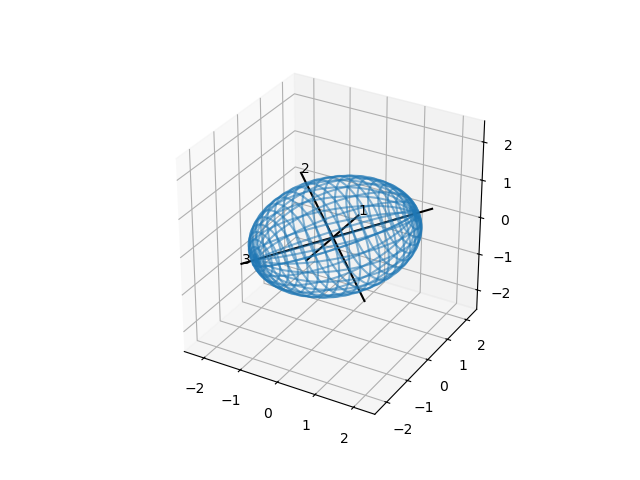

In [12]:
plot_ellipsoid(A)

## Degenerate Eigenvalues

The eigenvalues do not need to be distinct. If two or more eigenvalues are equal they are called degenerate. The eigenvectors associated with these eigenvalues are not unique: any linear combination of them will also satisfy the eigenvalue problem. To see this let us consider a different symmetric matrix,
$$ \mathsf{A} = \begin{pmatrix}
5 & 0 & 2 \\
0 & 1 & 0 \\
2 & 0 & 2
\end{pmatrix}. $$

In [13]:
A = np.array([[5., 0, 2], [0, 1, 0], [2, 0, 2]])
(lam, B) = la.eigh(A)
print("Eigenvalues:", lam)
print("Matrix of eigenvectors:\n", B)

Eigenvalues: [1. 1. 6.]
Matrix of eigenvectors:
 [[ 0.          0.4472136   0.89442719]
 [-1.          0.          0.        ]
 [ 0.         -0.89442719  0.4472136 ]]


Notice that the eigenvalue `1` appears twice. We can perform all the same tests from above to confirm that we have correctly solved the eigenvalue problem.

In [14]:
print("B^T = Binv?", np.allclose(B.T, la.inv(B)))
print("B^T B = I?", np.allclose(B.T @ B, np.identity(B.shape[0]), atol=1e-12, rtol=1e-12))
print("B B^T = I?", np.allclose(B @ B.T, np.identity(B.shape[0]), atol=1e-12, rtol=1e-12))
D = B.T @ A @ B
print("B^T A B =\n", D)
print("Matrix of eigenvalues?", np.allclose(D, np.diag(lam), atol=1e-12, rtol=1e-12))

B^T = Binv? True
B^T B = I? True
B B^T = I? True
B^T A B =
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.19692947e-15]
 [0.00000000e+00 6.78144704e-16 6.00000000e+00]]
Matrix of eigenvalues? True


These eigenvectors are not unique. If we call the eigenvectors found above $\vec v_0$, $\vec v_1$, and $\vec v_2$ then due to the degeneracy we can construct another set of vectors by taking any linear combinations of the first two. (In practice we typically want the eigenvectors to be orthogonal so we should ensure this is true in our new set of eigenvectors.) For example, we can construct a new set as
$$
\begin{align}
\vec v_0' &= \frac{1}{\sqrt 6}\vec v_0 - \sqrt{\frac{5}{6}} \vec v_1, \\
\vec v_1' &= \sqrt{\frac{5}{6}}\vec v_0 + \frac{1}{\sqrt 6} \vec v_1, \\
\vec v_2' &= \vec v_2.
\end{align}$$
Here $\vec v_2'$ is the same as above, but the first two are different. We can verify this is also a valid set using the same tests as above.

In [15]:
Bp = np.zeros_like(B)
Bp[:, 0] = 1/np.sqrt(6) * B[:, 0] - np.sqrt(5./6) * B[:, 1]
Bp[:, 1] = np.sqrt(5./6) * B[:, 0] + np.sqrt(1./6) * B[:, 1]
Bp[:, 2] = B[:, 2]
print("Alternate B =\n", Bp)
print("B^T = Binv?", np.allclose(Bp.T, la.inv(Bp), atol=1e-12, rtol=1e-12))
print("B^T B = I?", np.allclose(Bp.T @ Bp, np.identity(Bp.shape[0]), atol=1e-12, rtol=1e-12))
print("B B^T = I?", np.allclose(Bp @ Bp.T, np.identity(Bp.shape[0]), atol=1e-12, rtol=1e-12))
D = Bp.T @ A @ Bp
print("B^T A B =\n", D)
print("Matrix of eigenvalues?", np.allclose(D, np.diag(lam)))

Alternate B =
 [[-0.40824829  0.18257419  0.89442719]
 [-0.40824829 -0.91287093  0.        ]
 [ 0.81649658 -0.36514837  0.4472136 ]]
B^T = Binv? True
B^T B = I? True
B B^T = I? True
B^T A B =
 [[ 1.00000000e+00  5.73807731e-17 -1.14964814e-15]
 [ 7.65209819e-17  1.00000000e+00  5.34720368e-16]
 [-9.91374242e-16  3.83317957e-16  6.00000000e+00]]
Matrix of eigenvalues? True


We also see this is a positive definite matrix, so, we can again understand it geometrically.
What we showed above is that the degenerate eigenvalues do not uniquely determine the eigenvectors.
This means we can freely rotate about the axis perpendicular to the plane of the degenerate eigenvectors.
Geometrically this means that in the plane of the degenerate eigenvalues the ellipsoid has a circular cross section.
In other words, the ellipsoid is an ellipsoid of revolution around the non-degenerate direction.

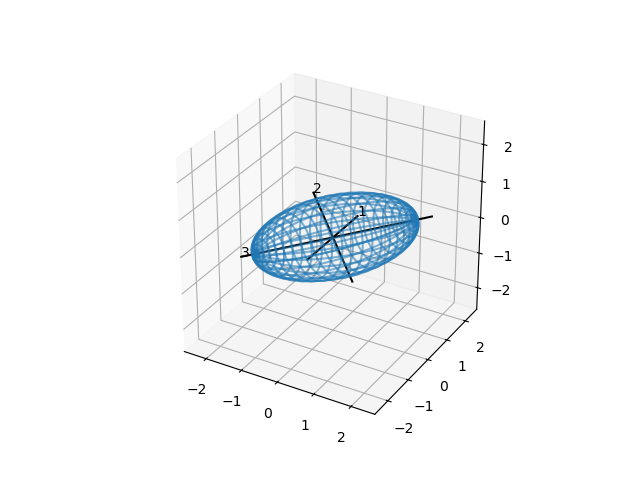

In [16]:
plot_ellipsoid(A)